In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from IPython.display import display, Latex
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import Sampler
from qiskit import transpile
import numpy as np
from qiskit_ibm_runtime import SamplerV2 as Sampler

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService (channel="ibm_quantum",
                                token="304636e08832e99bf5cd66f58d0f1180f193cd79e97987083aafe0ba33cef2f9ceb8ac2bba91aa24b612787451d32e9dc7206edf2e4347ba88443ba5261f04a6")

QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="304636e08832e99bf5cd66f58d0f1180f193cd79e97987083aafe0ba33cef2f9ceb8ac2bba91aa24b612787451d32e9dc7206edf2e4347ba88443ba5261f04a6",
                                  overwrite=True)




In [ ]:
import pennylane as qml
from qiskit_aer import AerSimulator
from qiskit_aer import Aer
qubits = 4
dev = qml.device("qiskit.aer", wires=qubits, backend="aer_simulator")

In [61]:

print(Aer.backends())

from pennylane import numpy as pnp
from qiskit_ibm_runtime import QiskitRuntimeService

import pennylane as qml

# Obtaining the Hamiltonian for H2 from PennyLane QChem dataset
[dataset] = qml.data.load("qchem", molname="H2", bondlength=0.742, basis="STO-3G")
H = dataset.hamiltonian
qubits = 4

# Initialize QiskitRuntimeService
service = QiskitRuntimeService()

backends = service.backends()
for backend in backends:
    print(backend.name)

backend = Aer.get_backend("aer_simulator")

try:
    # Our device supports a maximum of 31 qubits
    NUM_QUBITS_SUPPORTED = 31
    dev = qml.device("qiskit.remote", wires=NUM_QUBITS_SUPPORTED, backend=backend)
except Exception as e:
    print(e)

def four_qubit_ansatz(theta):
    # initial state 1100:
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)

    # change of basis
    qml.RX(pnp.pi / 2, wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)

    qml.CNOT(wires=[3, 2])
    qml.CNOT(wires=[2, 1])
    qml.CNOT(wires=[1, 0])

    qml.RZ(theta, wires=0)

    qml.CNOT(wires=[1, 0])
    qml.CNOT(wires=[2, 1])
    qml.CNOT(wires=[3, 2])

    # invert change of basis
    qml.RX(-pnp.pi / 2, wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)

from pennylane_qiskit import qiskit_session


@qml.qnode(dev)
def cost_fn(theta):
    four_qubit_ansatz(theta)
    return qml.expval(H)


max_iterations = 40
theta = pnp.array(0.0, requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.4)
energies = []



[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]
ibm_brisbane
ibm_sherbrooke
Backend 'AerSimulator('aer_simulator')' supports maximum 28 wires


In [62]:
for n in range(max_iterations):
    theta, prev_energy = opt.step_and_cost(cost_fn, theta)
    energies.append(prev_energy)
    print(f"第 {n+1} 步: E = {prev_energy:.8f} Ha")

第 1 步: E = -1.11851043 Ha
第 2 步: E = -1.12381383 Ha
第 3 步: E = -1.13742477 Ha
第 4 步: E = -1.13578990 Ha
第 5 步: E = -1.13512893 Ha
第 6 步: E = -1.13048382 Ha
第 7 步: E = -1.13538575 Ha
第 8 步: E = -1.13174698 Ha
第 9 步: E = -1.13357381 Ha
第 10 步: E = -1.12843870 Ha
第 11 步: E = -1.13668136 Ha
第 12 步: E = -1.12621651 Ha
第 13 步: E = -1.13836355 Ha
第 14 步: E = -1.12488847 Ha
第 15 步: E = -1.14087501 Ha
第 16 步: E = -1.13458893 Ha
第 17 步: E = -1.13970038 Ha
第 18 步: E = -1.11962360 Ha
第 19 步: E = -1.13576356 Ha
第 20 步: E = -1.14120550 Ha
第 21 步: E = -1.14516597 Ha
第 22 步: E = -1.13336430 Ha
第 23 步: E = -1.13816282 Ha
第 24 步: E = -1.13301015 Ha
第 25 步: E = -1.13723624 Ha
第 26 步: E = -1.13085284 Ha
第 27 步: E = -1.12529871 Ha
第 28 步: E = -1.13597307 Ha
第 29 步: E = -1.13462137 Ha
第 30 步: E = -1.11962360 Ha
第 31 步: E = -1.13902453 Ha
第 32 步: E = -1.14534305 Ha
第 33 步: E = -1.12178091 Ha
第 34 步: E = -1.13951453 Ha
第 35 步: E = -1.13797697 Ha
第 36 步: E = -1.13502283 Ha
第 37 步: E = -1.14445768 Ha
第 38 步: E 

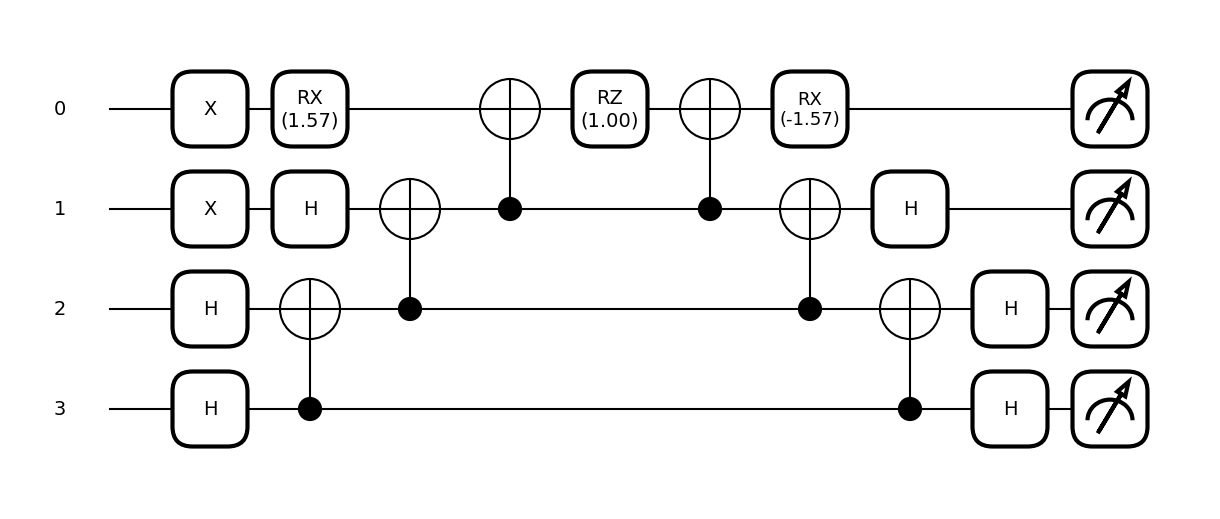

In [63]:
dev1 = qml.device("default.qubit", wires=4)
shots = 8000
dev2 = qml.device("qiskit.aer", wires=4, shots=shots)


@qml.qnode(dev1)
def cost_fn_1(theta):
    four_qubit_ansatz(theta)
    return qml.expval(H)


@qml.qnode(dev2)
def cost_fn_2(theta):
    four_qubit_ansatz(theta)
    return qml.expval(H)


# we can also use the qnode to draw the circuit
import matplotlib.pyplot as plt

qml.draw_mpl(cost_fn_1, decimals=2)(theta=1.0)
plt.show()

In [64]:
stepsize = 0.4
max_iterations = 40
opt = qml.GradientDescentOptimizer(stepsize=stepsize)
theta_1 = pnp.array(0.0, requires_grad=True)
theta_2 = pnp.array(0.0, requires_grad=True)
energies_1 = []
energies_2 = []
for n in range(max_iterations):
    theta_1, prev_energy_1 = opt.step_and_cost(cost_fn_1, theta_1)
    theta_2, prev_energy_2 = opt.step_and_cost(cost_fn_2, theta_2)
    print(prev_energy_1, prev_energy_2)
    energies_1.append(prev_energy_1)
    energies_2.append(prev_energy_2)

-1.116651162745698 -1.1172404608387934
-1.1277210893591845 -1.1277681548867813
-1.1328704605415478 -1.1326684519934958
-1.1352462817003883 -1.1363274329284945
-1.1363382828544415 -1.136078209187027
-1.136839321604315 -1.1383738053711894
-1.1370690262304453 -1.1389483994167167
-1.1371742969727925 -1.1386269329079142
-1.137222533058368 -1.137072549211895
-1.137244633589533 -1.1411054131003626
-1.1372547591230846 -1.1368779895097139
-1.1372593981409393 -1.1360680950112345
-1.1372615234932326 -1.1440262099008902
-1.1372624972137613 -1.1401821920455188
-1.1372629433187125 -1.13683456344353
-1.1372631476992088 -1.1394316461406349
-1.1372632413349624 -1.1379512204032443
-1.137263284233641 -1.1378163523329174
-1.13726330388742 -1.1330990339170228
-1.1372633128916843 -1.1346262571125283
-1.1372633170169355 -1.1347664011311476
-1.137263318906895 -1.1365395713587239
-1.1372633197727688 -1.1348471965561717
-1.1372633201694644 -1.1394104476649312
-1.1372633203512073 -1.1368304112925476
-1.137263320

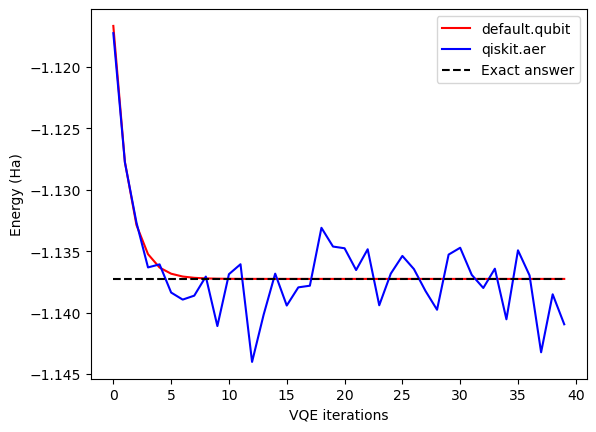

In [65]:
plt.plot(energies_1, color="r", label="default.qubit")
plt.plot(energies_2, color="b", label="qiskit.aer")

# min energy = min eigenvalue
min_energy = min(qml.eigvals(H))
z = [min_energy] * max_iterations

plt.plot(z, "--", color="k", label="Exact answer")
plt.xlabel("VQE iterations")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.show()

In [71]:
backend = Aer.get_backend("aer_simulator")
print("Supported basis gates:", backend.configuration().basis_gates)

Supported basis gates: ['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'roerror', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'break_loop', 'continue_loop', 'delay', 'for_loop', 'if_else', 'initialize', 'kraus', 'qerror_loc', 'quantum_channel', 'reset', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_clifford', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_matrix_product_state', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'save_superop', 'save_unitary', 'set_density_matrix', 'set_matrix_product_state', 'set_stabilizer', 'set_sta

In [72]:
from qiskit import transpile

basis_gates = ['cx', 'rz', 'sx']  # 指定允许的门集合
optimized_qc = transpile(qc, basis_gates=basis_gates, optimization_level=3)

# 打印结果
print(optimized_qc.count_ops())
optimized_qc.draw('mpl')

AttributeError: 'function' object has no attribute 'name'